In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

%matplotlib inline

In [2]:
# Image data directories
image_dir_training = "images/training/" # 60%
image_dir_test = "images/test/" # 40%

categories = ["day", "night"]

In [3]:
# Create the datasets' arrays
training_data = []
test_data = []

def appendImagesToArray(images_path):
    data_array = training_data if images_path == training_path else test_data
    for img in os.listdir(images_path):
        try:
            img_array =  cv2.imread(os.path.join(images_path,img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            
            data_array.append([img_array, class_name])
        except Exception as e:
            pass

for category in categories:
    training_path = os.path.join(image_dir_training, category)
    test_path = os.path.join(image_dir_test, category)
    class_name = categories[categories.index(category)]
    
    # Append images to the training_data array
    appendImagesToArray(training_path)
        
    # Append images to the test_data array
    appendImagesToArray(test_path)

### Visualize the input images

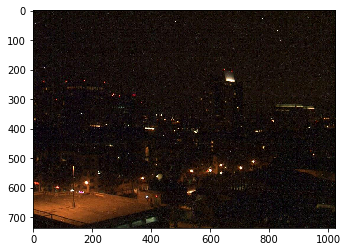

In [4]:
# Display a night image
image_index = 0

while training_data[image_index][1] == "day":
    image_index += 1
    if training_data[image_index][1] == "night":
        night_image = training_data[image_index][0]
        break
plt.imshow(night_image)

### Pre-process the Data

In [5]:
def standardize_input(image):
    """"Resize image to the size 1100x600 (wxh)"""
    standard_im = cv2.resize(image, (1100, 600))
    return standard_im

def encode(label):
    """Output 1 if label is day and 0 if it's night"""    
    numerical_val = 1 if label == "day" else 0
    return numerical_val

In [6]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_TRAINING_LIST = standardize(training_data)
STANDARDIZED_TEST_LIST = standardize(test_data)

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


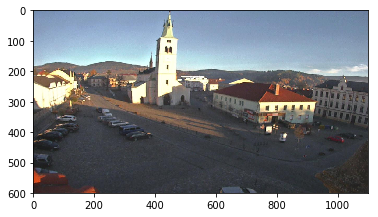

In [7]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_TRAINING_LIST[image_num][0]
selected_label = STANDARDIZED_TRAINING_LIST[image_num][1]

# Display image and data about it
## TODO: Make sure the images have numerical labels and are of the same size
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

### Feature Extraction

Label: 1


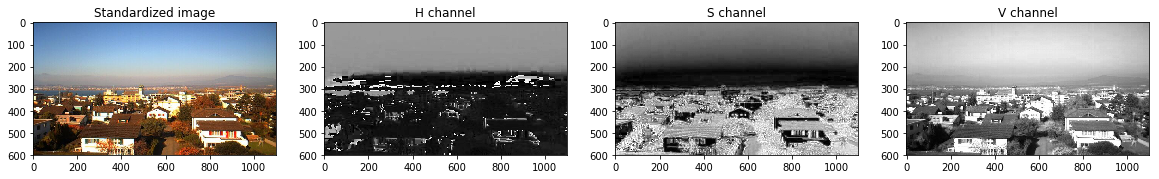

In [8]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_TEST_LIST[image_num][0]
test_label = STANDARDIZED_TEST_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [9]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    # Calculate the average brightness using the area of the image
    # and the sum calculated above
    area = 600 * 1100.0
    avg = sum_brightness / area
    
    return avg

Avg brightness: 176.83844242424243


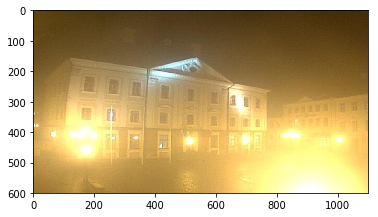

In [10]:
image_num = 150
test_im = STANDARDIZED_TEST_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

### Classification

In [11]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    # TO-DO: Extract average brightness feature from an RGB image 
    avg_brgt = avg_brightness(rgb_image)
        
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    # TO-DO: Try out different threshold values to see what works best!
    threshold = 100.0
    if(avg_brgt > threshold):
        # if the average brightness is above the threshold value, we classify it as "day"
        predicted_label = 1
    # else, the predicted_label can stay 0 (it is predicted to be "night")
    
    return predicted_label   

In [12]:
import random
random.shuffle(STANDARDIZED_TEST_LIST)

In [13]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im, true_label = image[0], image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


In [14]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.925
Number of misclassified images = 12 out of 160


1


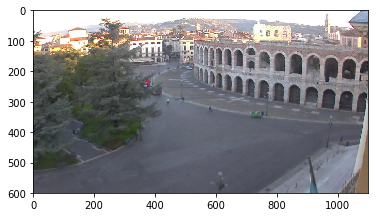

In [15]:
# Visualize example
num = 0
test_mis_im = STANDARDIZED_TEST_LIST[num][0]
plt.imshow(test_mis_im)
print(STANDARDIZED_TEST_LIST[num][1]) # day = 1, night = 0